In [1]:
%matplotlib inline
import os 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Video

# Working with ALFAsim exported transient trend plots

## Introduction

The example shown here demonstrates the ALFAsim post-processing capabilities from an exported `.xls` file.

## Import

First, we import the alfasim.from_plotsmodule to handle the exported ALFAsim data, and `statistical_tools.common_functions` to temporally average the data.

In [2]:
from multi_transient_reader.alfasim.from_plots.xls_reader import read_alfasim_xls_trend_file
from multi_transient_reader.statistical_tools.common_functions import compute_temporal_average

## Data Export

This example uses data exported directly from the trend window of ALFAsim's software.

The data was exported as shown in the animation below.

In [13]:
Video(Path('data','videos','alfasim_example_01.mp4'), embed=True, width=640, height=360)

## Reading Data

After exporting the `.xls` file, we read the data as shown below. Then, we can navigate through the exported results

In [13]:
xls_file = Path(os.path.join(os.getcwd(),"data/alfasim/from_plots.xls"))
print(xls_file)
results_dictionary = read_alfasim_xls_trend_file(xls_file)

C:\Users\rafaelfc\multi_transient_reader\multi_transient_reader\examples\data\alfasim\from_plots.xls


## Exploring the Exported Data

The exported data is now stored in the `results_dictionary` dictionary. 

From this dictionary, we can loop through and navigate the exported data.

The example case consists of two parametric runs. 

Let's iterate over the results and explore them. First, let's check how the data is organized in `results_dictionary`.

In [5]:
for parametric_run in results_dictionary.keys():
    print(f"Parametric Run {parametric_run}")
    for i, edge in enumerate(results_dictionary[parametric_run].keys()):
        if i == 0:
            time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
            continue
        print(f"  |{edge}")
        for probe in results_dictionary[parametric_run][edge].keys():
            probe_properties = results_dictionary[parametric_run][edge][probe]
            print(f"    |Probe @ {probe_properties['position']} [m]")
            for j, variable in enumerate(probe_properties.keys()):
                if j == 0: # The first entry is the position information. Currently we are assuming [m]
                    continue
                print(f"      |{variable} [{probe_properties[variable]['unit']}]")

Parametric Run 1
  |Conn 1
    |Probe @ 14.33 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
    |Probe @ 22.63 [m]
      |Absolute Pressure [bar]
    |Probe @ 7.98 [m]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]
    |Probe @ 5.0 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]
Parametric Run 0
  |Conn 1
    |Probe @ 14.33 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
    |Probe @ 22.63 [m]
      |Absolute Pressure [bar]
    |Probe @ 7.98 [m]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]
    |Probe @ 5.0 [m]
      |Absolute Pressure [bar]
      |Holdup [m3/m3]
      |Total Oil Mass Flow Rate [kg/s]


## Example 1 -- Averaging data over time

As observed, we can easily navigate through the exported results. 

To access the temporal values, we simply use the `values` key.

Let's compute the time-averaged results for each variable across the different parametric runs, edges, and probes.

In [6]:
for parametric_run in results_dictionary.keys():
    print(f"Parametric Run {parametric_run}")
    for i, edge in enumerate(results_dictionary[parametric_run].keys()):
        if i == 0:
            time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable. We are always assuming [s]
            continue
        print(f"  |{edge}")
        for probe in results_dictionary[parametric_run][edge].keys():
            probe_properties = results_dictionary[parametric_run][edge][probe]
            print(f"    |Probe @ {probe_properties['position']} [m]")
            for j, variable in enumerate(probe_properties.keys()):
                if j == 0: # The first entry is the position information. Currently we are assuming [m]
                    continue
                avg_value = compute_temporal_average(time_values, probe_properties[variable]['values'])
                unit = probe_properties[variable]['unit']
                print(f"      |Time-averaged - {variable} =  {avg_value:.4f} [{unit}]")
    print('\n')

Parametric Run 1
  |Conn 1
    |Probe @ 14.33 [m]
      |Time-averaged - Absolute Pressure =  2.1922 [bar]
      |Time-averaged - Holdup =  0.0988 [m3/m3]
    |Probe @ 22.63 [m]
      |Time-averaged - Absolute Pressure =  2.0870 [bar]
    |Probe @ 7.98 [m]
      |Time-averaged - Holdup =  0.1012 [m3/m3]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]
  |Conn 2
    |Probe @ 10.0 [m]
      |Time-averaged - Absolute Pressure =  2.0005 [bar]
      |Time-averaged - Holdup =  0.1509 [m3/m3]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]
    |Probe @ 5.0 [m]
      |Time-averaged - Absolute Pressure =  2.0006 [bar]
      |Time-averaged - Holdup =  0.1008 [m3/m3]
      |Time-averaged - Total Oil Mass Flow Rate =  0.0000 [kg/s]


Parametric Run 0
  |Conn 1
    |Probe @ 14.33 [m]
      |Time-averaged - Absolute Pressure =  2.0376 [bar]
      |Time-averaged - Holdup =  0.2132 [m3/m3]
    |Probe @ 22.63 [m]
      |Time-averaged - Absolute Pressure =  2.0187 [bar]


## Example 2 -- Plotting temporal results


To finish our examples, let's plot the transient pressure and holdup values along the different probes.

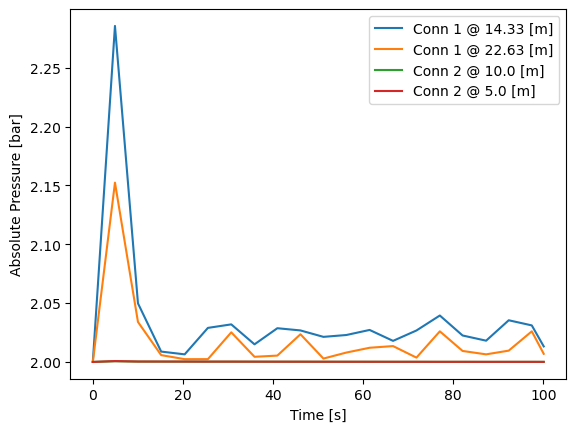

In [7]:
parametric_run = '0'
variable = 'Absolute Pressure'
for i, edge in enumerate(results_dictionary[parametric_run].keys()):
    if i == 0:
        time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
        continue
    for probe in results_dictionary[parametric_run][edge].keys():
        probe_properties = results_dictionary[parametric_run][edge][probe]
        if variable in probe_properties.keys():
            variable_values = probe_properties[variable]['values']

            plt.plot(time_values, variable_values, label=f"{edge} @ {probe_properties['position']} [m]")
plt.xlabel('Time [s]')
plt.ylabel(f"{variable} [{probe_properties[variable]['unit']}]")
plt.legend()

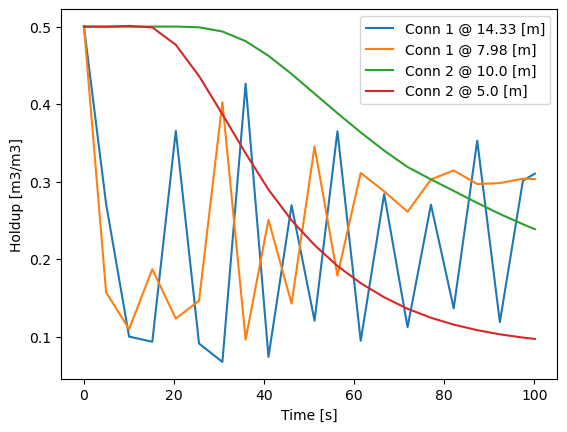

In [8]:
parametric_run = '0'
variable = 'Holdup'
for i, edge in enumerate(results_dictionary[parametric_run].keys()):
    if i == 0:
        time_values =  results_dictionary[parametric_run][edge] # The first entry here is the time variable
        continue
    for probe in results_dictionary[parametric_run][edge].keys():
        probe_properties = results_dictionary[parametric_run][edge][probe]
        if variable in probe_properties.keys():
            variable_values = probe_properties[variable]['values']

            plt.plot(time_values, variable_values, label=f"{edge} @ {probe_properties['position']} [m]")
plt.xlabel('Time [s]')
plt.ylabel(f"{variable} [{probe_properties[variable]['unit']}]")
plt.legend()
